<a href="https://colab.research.google.com/github/VitalyGladyshev/med_work/blob/main/Med_Stat_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прикладная статистика в медицине

## ДЗ 4 Гладышев В.В.

## Тесты для 3 и более групп сравнения, post-hoc тестирование

Проведём дисперсионный анализ. В качестве нулевой гипотезы примем, что средние соответствующих признаков не имеют статистически значимых различий.

In [1]:
data_metadata <- read.csv('/content/metadata.tsv', header = TRUE, sep = '\t')
head(data_metadata)

,Vialnumber,Patientnumber,Sucrose,Name,Group,Date,Age,Plasmavolume,Ht,Wt,⋯,rlatmax,rantmax,rposmax,llatmax,lantmax,lposmax,carotidIMTmean,Plaque,Statins,comorbidities
,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,1,50,0,"Begaye, Decarlo",0,2023-01-14,63,6.5,163,84.0,⋯,0.65,0.80,0.80,0.81,0.78,0.80,0.6425000,1,1,NA
2,2,51,0,"Sweetwater, Kristen",0,2022-10-09,47,5.5,179,111.0,⋯,1.03,0.92,1.03,1.03,1.03,1.09,0.8400000,1,0,NA
3,3,52,0,"Figurelli, Samuel",1,2023-10-24,57,7.0,164,80.0,⋯,1.00,0.90,0.95,0.85,0.90,0.90,0.8500000,3,1,Type 2 diabetes mellitus; MI - 2016
4,4,53,0,"Pamphille, Mehgan",1,2023-07-02,72,5.0,160,58.8,⋯,0.91,0.97,0.98,0.86,0.74,0.80,0.8241667,2,0,1-2 times per year hypertensive crises (Corinfar)
5,5,54,0,"Morgan, Rollin",1,2022-11-27,57,5.0,180,71.0,⋯,1.20,1.20,1.25,1.10,1.30,1.13,1.0983333,1,1,NA
6,6,55,0,"Abdul-Amin, Taelor",1,2022-07-12,79,6.2,160,64.0,⋯,0.88,0.80,0.90,1.07,1.00,1.30,0.8475000,2,0,"Cholecystitis, gastritis without exacerbation. Diffuse focal changes in the thyroid gland"


In [2]:
data_lipids_low <- read.csv('/content/low_density_lipids.tsv', header = TRUE, sep = '\t')
head(data_lipids_low)

,Vial.number,Patient.number,Name,GPLDL1,GPLDL2,GPLDL3,GPLDL4,GPLDL5,GPLDL6,GPLDL7,⋯,G1,G2,G3,S0,S1,S2,S3,B,F,HM
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,50,LDL,0.40,6.74,0.20,0.02,1.09,3.79,2.27,⋯,4.09,68.91,3.57,3.98,28.18,42.46,1.95,0.02,1.67,13.02
2,3,52,LDL,0.46,7.37,0.39,0.02,1.06,4.55,2.71,⋯,5.16,68.22,3.11,4.64,30.43,39.86,1.56,0.02,1.69,14.16
3,4,53,LDL,0.30,8.23,0.26,0.02,0.88,3.66,2.32,⋯,3.95,68.03,4.50,3.78,29.37,41.13,2.20,0.02,1.89,13.89
4,5,54,LDL,0.47,7.94,0.29,0.02,1.11,3.97,2.55,⋯,4.63,66.91,4.03,4.44,28.54,40.64,1.95,0.02,2.03,14.25
5,6,55,LDL,0.31,9.68,0.18,0.02,0.97,4.50,2.24,⋯,4.05,64.01,5.27,3.72,26.71,40.39,2.51,0.02,2.70,16.06
6,7,56,LDL,0.30,7.32,0.22,0.02,1.12,4.19,2.37,⋯,4.10,65.99,4.70,4.03,28.44,39.99,2.33,0.02,1.61,13.82


In [3]:
data_lipids_high <- read.csv('/content/high_density_lipids.tsv', header = TRUE, sep = '\t')
head(data_lipids_high)

,Vial.number,Patient.number,Name,GPHDL1,GPHDL2,GPHDL3,GPHDL4,GPHDL5,GPHDL6,GPHDL7,⋯,G1,G2,G3,S0,S1,S2,S3,B,F,HM
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,50,HDL,0.38,1.78,0.14,0.05,0.73,2.90,1.57,⋯,12.23,58.69,20.97,2.87,29.57,44.39,15.06,0.05,7.35,2.49
2,3,52,HDL,0.43,1.30,0.23,0.05,0.59,2.62,1.62,⋯,11.98,57.50,21.94,2.92,29.60,43.93,14.97,0.05,8.71,1.53
3,4,53,HDL,0.41,3.86,0.31,0.10,0.96,3.19,2.42,⋯,15.00,62.10,12.74,4.20,37.03,40.68,7.93,0.10,4.81,5.08
4,5,54,HDL,0.50,1.79,0.23,0.06,0.77,2.96,1.76,⋯,12.85,56.02,22.70,3.32,30.01,41.78,16.46,0.06,8.85,2.30
5,6,55,HDL,0.40,3.69,0.17,0.03,0.80,3.04,1.62,⋯,13.81,59.78,16.14,3.02,33.69,42.18,10.84,0.03,7.25,4.33
6,7,56,HDL,0.37,2.96,0.22,0.05,1.00,3.00,2.11,⋯,14.61,60.59,15.63,3.75,35.18,41.66,10.24,0.05,5.10,3.87


In [4]:
dim(data_metadata); dim(data_lipids_low); dim(data_lipids_high)

[1] 38 49

[1] 29 38

[1] 27 38

In [5]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
data_metadata <- data_metadata %>% select_if(is.numeric)
data_lipids_high <- data_lipids_high %>% select_if(is.numeric)
data_lipids_low <- data_lipids_low %>% select_if(is.numeric)

In [7]:
str(data_metadata)

'data.frame':	38 obs. of  46 variables:
 $ Vialnumber    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Patientnumber : int  50 51 52 53 54 55 56 57 58 59 ...
 $ Sucrose       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Group         : int  0 0 1 1 1 1 1 1 0 1 ...
 $ Age           : int  63 47 57 72 57 79 61 70 50 53 ...
 $ Plasmavolume  : num  6.5 5.5 7 5 5 6.2 6.5 5.5 6 5.5 ...
 $ Ht            : int  163 179 164 160 180 160 164 162 150 172 ...
 $ Wt            : num  84 111 80 58.8 71 64 67 61 79 88.2 ...
 $ BMI           : num  31.6 34.6 29.7 23 21.9 ...
 $ Sys           : int  125 125 132 130 135 110 124 135 142 120 ...
 $ Dia           : int  76 82 80 90 75 75 82 78 95 80 ...
 $ PR            : int  67 65 92 68 70 66 84 72 88 60 ...
 $ Sm            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Dm            : int  0 0 1 0 0 0 0 0 0 1 ...
 $ HT            : int  0 1 1 0 1 1 0 0 1 1 ...
 $ LVH           : int  1 1 1 0 0 1 0 1 0 1 ...
 $ IHD           : int  0 0 1 0 1 1 1 1 0 1 ...
 $ MI            : int  0 0 1 0 0

In [17]:
analyze_features <- function(low, high) {
  # Тест на нормальное распределение
  shapiro_p_high <- shapiro.test(high)$p.value
  shapiro_p_low <- shapiro.test(low)$p.value

  cat("\tТест Шапиро-Улка p-values - При min:", shapiro_p_high, "При max:", shapiro_p_low, "\n")

  # Признак нормального распределения
  normal_dist_high <- shapiro_p_high > 0.05
  normal_dist_low <- shapiro_p_low > 0.05

  if (normal_dist_high) {
    cat("\t\tВыборка при max нормально распределена.\n")
  } else {
    cat("\t\tРаспределение выборки при max отлично от нормального.\n")
  }

  if (normal_dist_low) {
    cat("\t\tВыборка при min нормально распределена.\n")
  } else {
    cat("\t\tРаспределение выборки при min отлично от нормального.\n")
  }

  # Устанавливаем признак при условии нормального распределения признака в обоих наборах
  normal_dist <- normal_dist_high & normal_dist_low

  # Выбираем соответствующий тест на основе признака нормального распределения
  if (normal_dist) {
    test <- t.test(high, low, paired = FALSE)
    test_name <- "\tt-test для независимых выборок"
  } else {
    # Проверка на наличие "хвостов"
    if (length(unique(c(high, low))) < length(c(high, low))) {
      # Обнаружен - используем приближённый метод
      test <- wilcox.test(high, low, paired = FALSE, exact = FALSE)
    } else {
      # Не обнаружен - используем точный метод
      test <- wilcox.test(high, low, paired = FALSE, exact = TRUE)
    }
    test_name <- "\tМанн-Уитни U тест"
  }

  # Output test results
  cat("\tТест:", test_name, "\n")

  if (test$p.value < 0.05) {
    cat("\tОбнаружены статистически значимые различия (p-value:", test$p.value, ").\n")
  } else {
    cat("\tСтатистически значимые различия не обнаружены (p-value:", test$p.value, ").\n")
  }

  return(list(shapiro_p_high = shapiro_p_high, shapiro_p_low = shapiro_p_low, normal_dist = normal_dist, test = test))
}

In [18]:
results <- list()
str_list_min_feat = c("rlatmin", "rantmin", "rposmin", "llatmin", "lantmin", "lposmin")
str_list_max_feat = c("rlatmax", "rantmax", "rposmax", "llatmax", "lantmax", "lposmax")

for (ind in 1:length(str_list_min_feat)) {
  cat("\nПризнаки:", str_list_min_feat[ind], str_list_max_feat[ind], "\n")
  result <- analyze_features(data_metadata[[str_list_min_feat[ind]]], data_metadata[[str_list_max_feat[ind]]])
  results[[ind]] <- result
}


Признаки: rlatmin rlatmax 
	Тест Шапиро-Улка p-values - При min: 0.6422775 При max: 0.173403 
		Выборка при max нормально распределена.
		Выборка при min нормально распределена.
	Тест: 	t-test для независимых выборок 
	Обнаружены статистически значимые различия (p-value: 4.897969e-07 ).

Признаки: rantmin rantmax 
	Тест Шапиро-Улка p-values - При min: 0.5126461 При max: 0.05931637 
		Выборка при max нормально распределена.
		Выборка при min нормально распределена.
	Тест: 	t-test для независимых выборок 
	Обнаружены статистически значимые различия (p-value: 5.887671e-09 ).

Признаки: rposmin rposmax 
	Тест Шапиро-Улка p-values - При min: 0.4503247 При max: 0.5284752 
		Выборка при max нормально распределена.
		Выборка при min нормально распределена.
	Тест: 	t-test для независимых выборок 
	Обнаружены статистически значимые различия (p-value: 7.065773e-09 ).

Признаки: llatmin llatmax 
	Тест Шапиро-Улка p-values - При min: 0.1315987 При max: 0.007599852 
		Выборка при max нормально расп

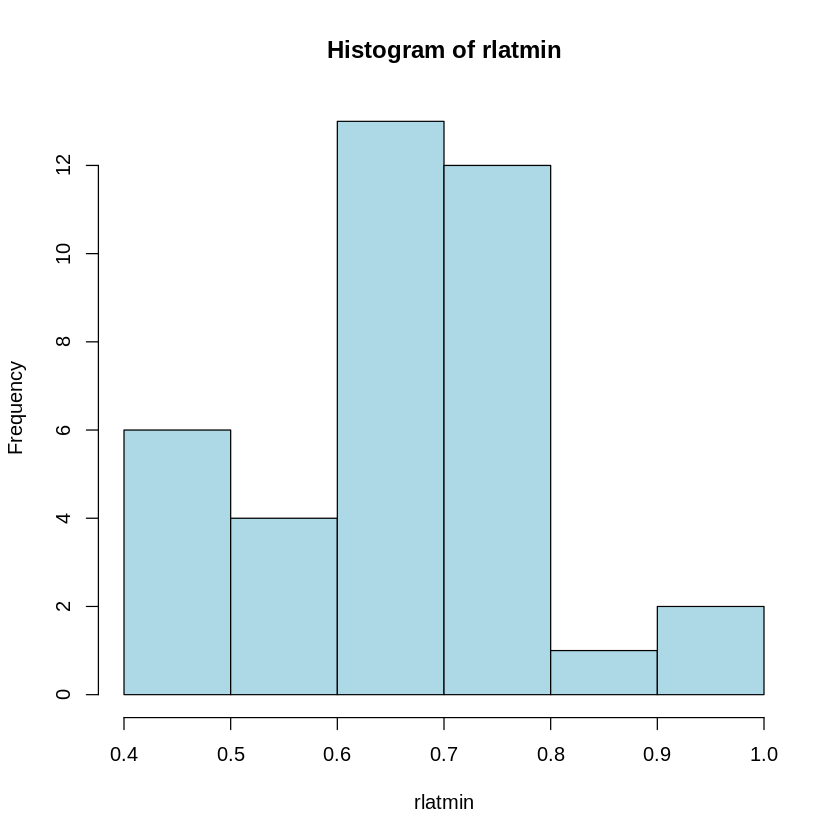

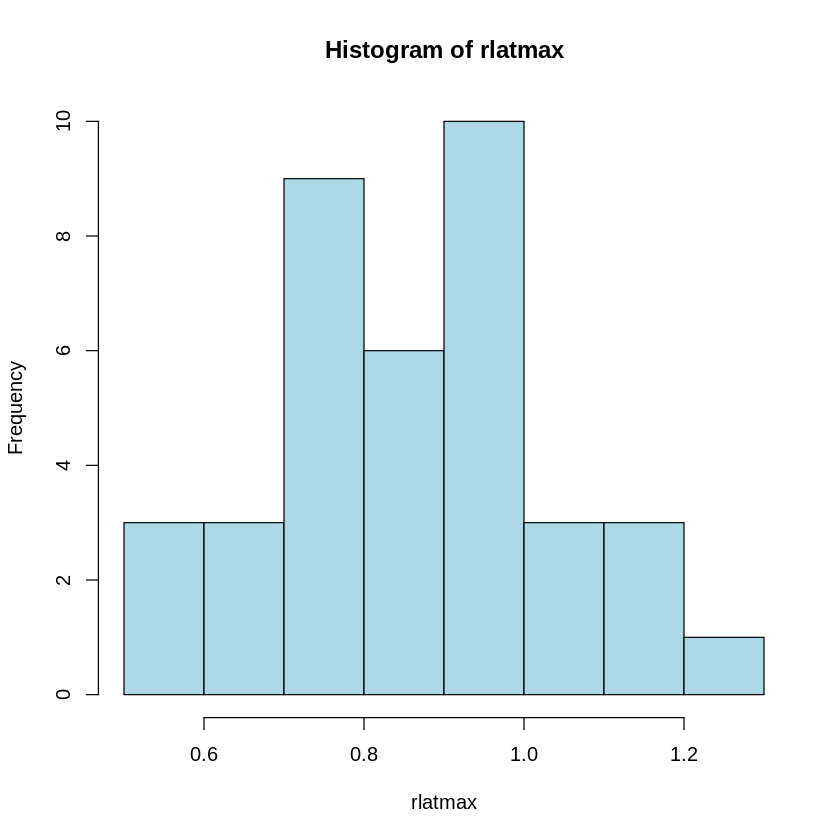

In [48]:
hist(data_metadata$rlatmin, main = "Histogram of rlatmin", xlab = "rlatmin", col = "lightblue")
hist(data_metadata$rlatmax, main = "Histogram of rlatmax", xlab = "rlatmax", col = "lightblue")

## Установка библиотек

In [ ]:
library(ggplot2)
library(dplyr)

In [24]:
# Install R package car
install.packages('car')
# Import the R package
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [25]:
install.packages('Hmisc')
library(Hmisc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [26]:
install.packages('multcomp')
library(multcomp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




In [27]:
install.packages('gridExtra')
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Дисперсионный анализ парамерт rlatmin

Группируем по параметру Group

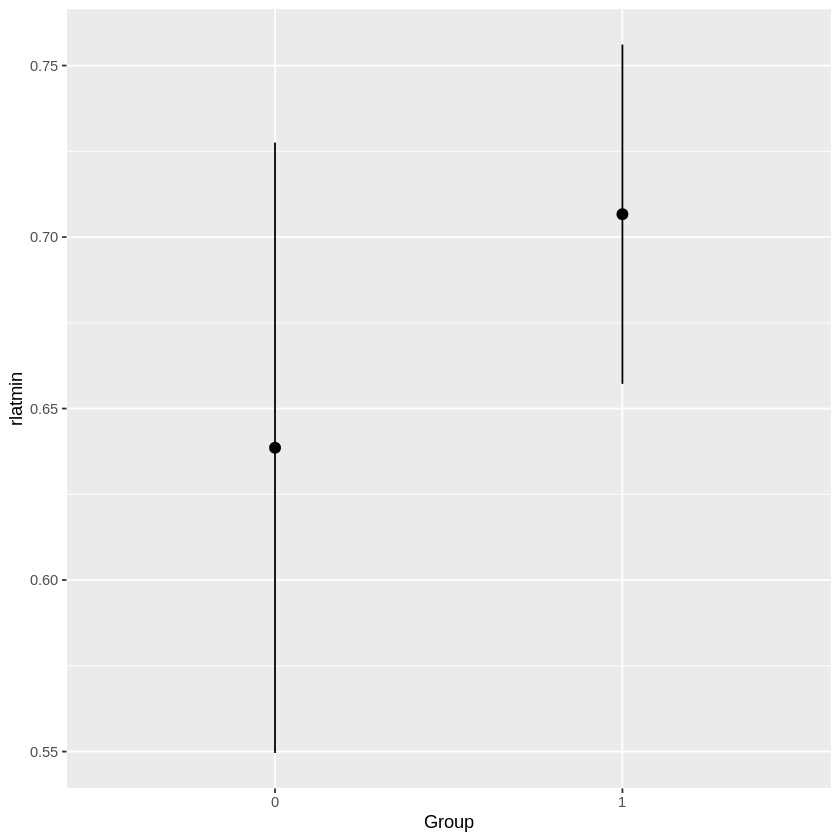

In [57]:
ggplot(data_metadata, aes(x = Group, y = rlatmin, colour = rlatmin)) + stat_summary(fun.data = "mean_cl_normal")

Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


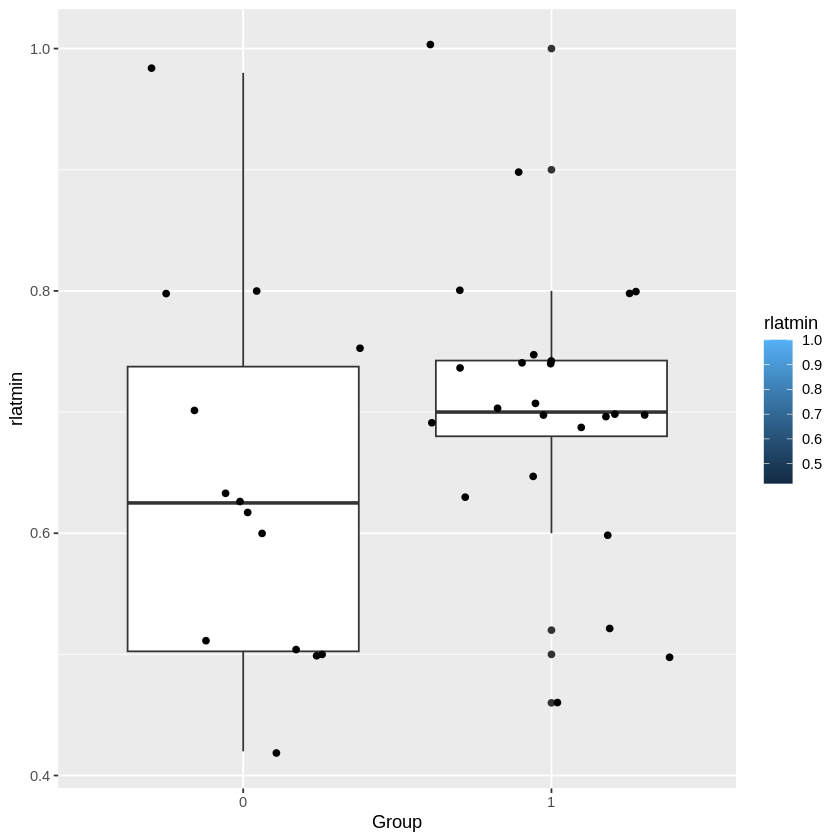

In [58]:
ggplot(data_metadata, aes(x = Group, y = rlatmin, fill = rlatmin)) + geom_boxplot() + geom_jitter()

In [63]:
mod_md <- lm(rlatmin ~ Group, data = data_metadata)
summary(mod_md)


Call:
lm(formula = rlatmin ~ Group, data = data_metadata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24667 -0.07167 -0.00667  0.05690  0.34143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.63857    0.03520  18.144   <2e-16 ***
Group1       0.06810    0.04429   1.538    0.133    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1317 on 36 degrees of freedom
Multiple R-squared:  0.06163,	Adjusted R-squared:  0.03556 
F-statistic: 2.364 on 1 and 36 DF,  p-value: 0.1329


In [64]:
amoeba_anova <- Anova(mod_md)
amoeba_anova

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Group,0.0410005,1,2.364259,0.1328868
Residuals,0.6243048,36,NA,NA


In [65]:
bartlett.test(rlatmin ~ Group,  data = data_metadata)


	Bartlett test of homogeneity of variances

data:  rlatmin by Group
Bartlett's K-squared = 1.2622, df = 1, p-value = 0.2612


In [66]:
kruskal.test(rlatmin ~ Group,  data = data_metadata)


	Kruskal-Wallis rank sum test

data:  rlatmin by Group
Kruskal-Wallis chi-squared = 2.4986, df = 1, p-value = 0.1139


In [69]:
data_metadata$Group <- as.factor(data_metadata$Group)

anova_rlatmin <- aov(rlatmin ~ Group, data = data_metadata)

anova_rlatmax <- aov(rlatmax ~ Group, data = data_metadata)

summary(anova_rlatmin)

summary(anova_rlatmax)

            Df Sum Sq Mean Sq F value Pr(>F)
Group        1 0.0410 0.04100   2.364  0.133
Residuals   36 0.6243 0.01734               

            Df Sum Sq Mean Sq F value Pr(>F)  
Group        1 0.1328 0.13282   4.763 0.0357 *
Residuals   36 1.0039 0.02789                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Дисперсионный анализ carotidIMTmean и Tgi_exp

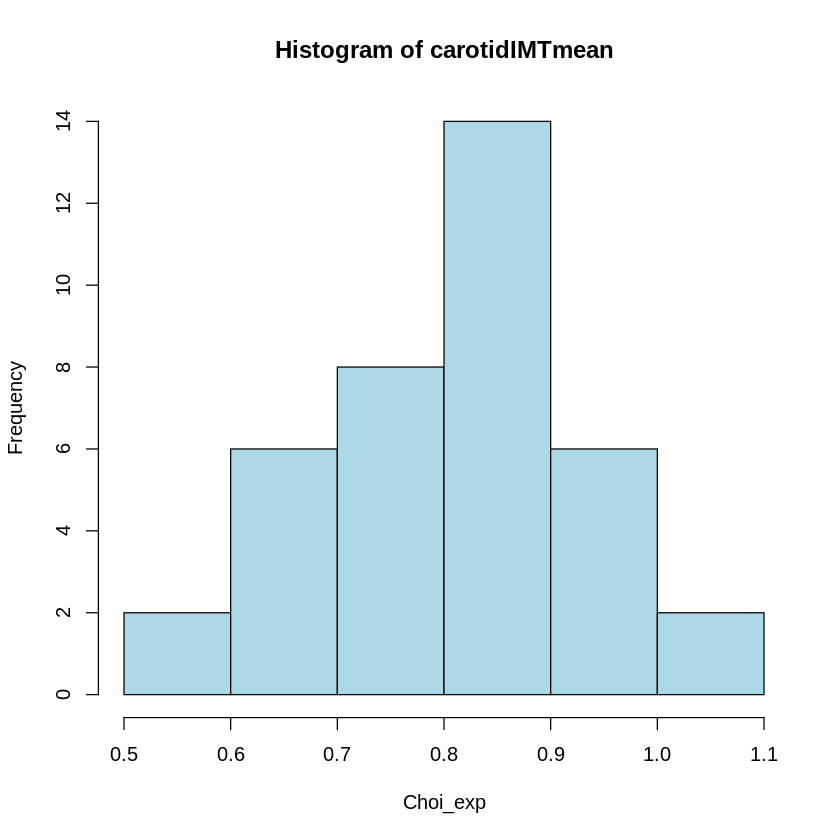

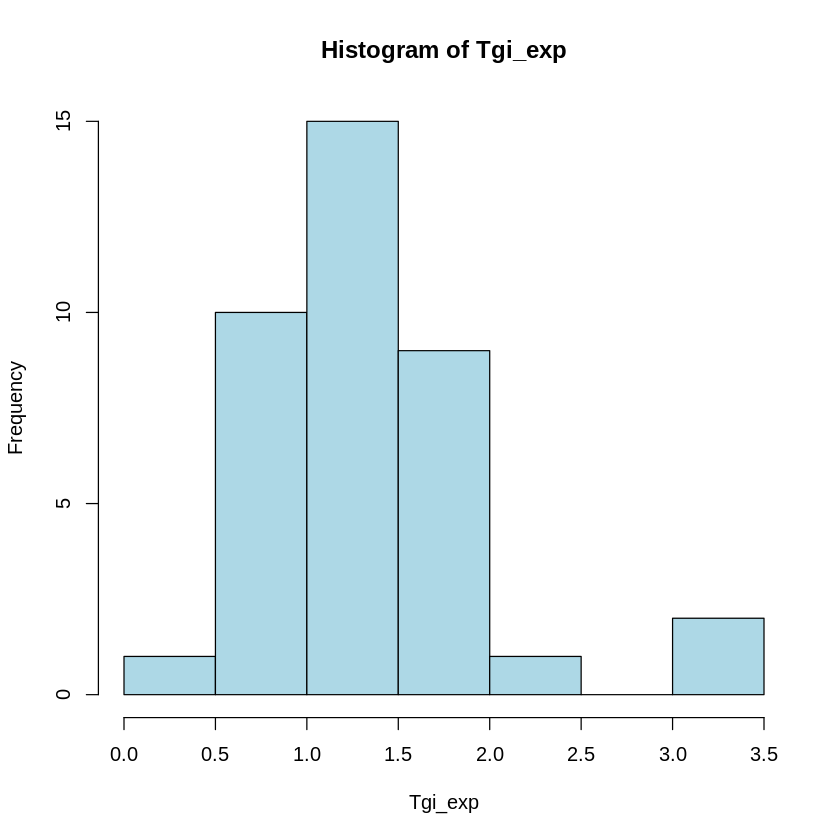

In [78]:
hist(data_metadata$carotidIMTmean, main = "Histogram of carotidIMTmean", xlab = "Choi_exp", col = "lightblue")
hist(data_metadata$Tgi_exp, main = "Histogram of Tgi_exp", xlab = "Tgi_exp", col = "lightblue")

In [79]:
data_metadata$Group <- as.factor(data_metadata$Group)

In [81]:
shapiro.test(data_metadata$carotidIMTmean)
shapiro.test(data_metadata$Tgi_exp)


	Shapiro-Wilk normality test

data:  data_metadata$carotidIMTmean
W = 0.97518, p-value = 0.5488



	Shapiro-Wilk normality test

data:  data_metadata$Tgi_exp
W = 0.87282, p-value = 0.0004746


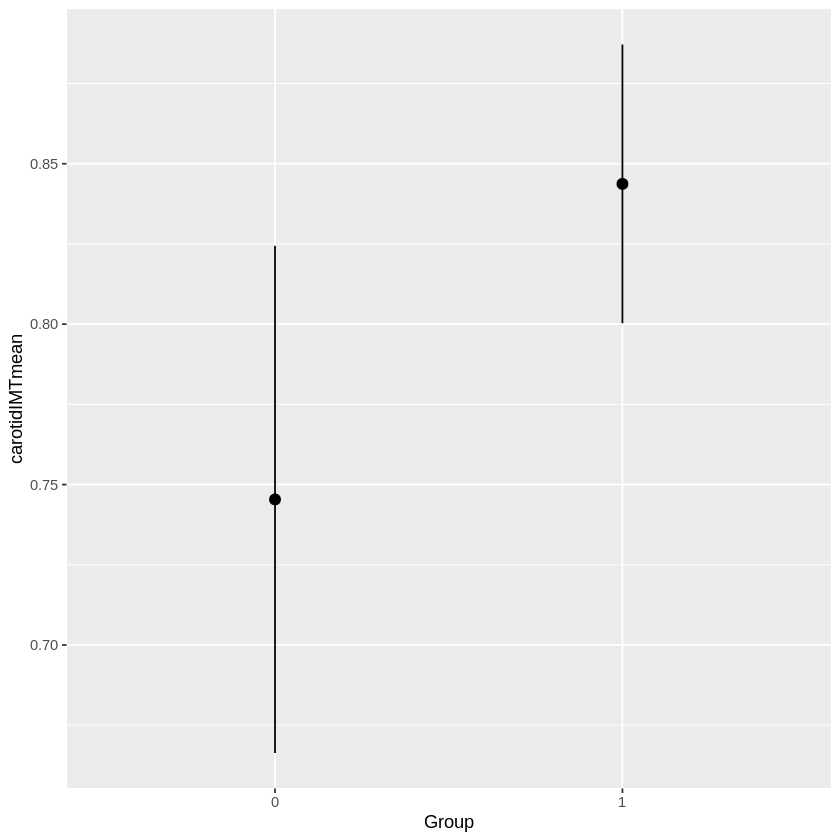

In [82]:
ggplot(data_metadata, aes(x = Group, y = carotidIMTmean, colour = Choi_exp)) + stat_summary(fun.data = "mean_cl_normal")

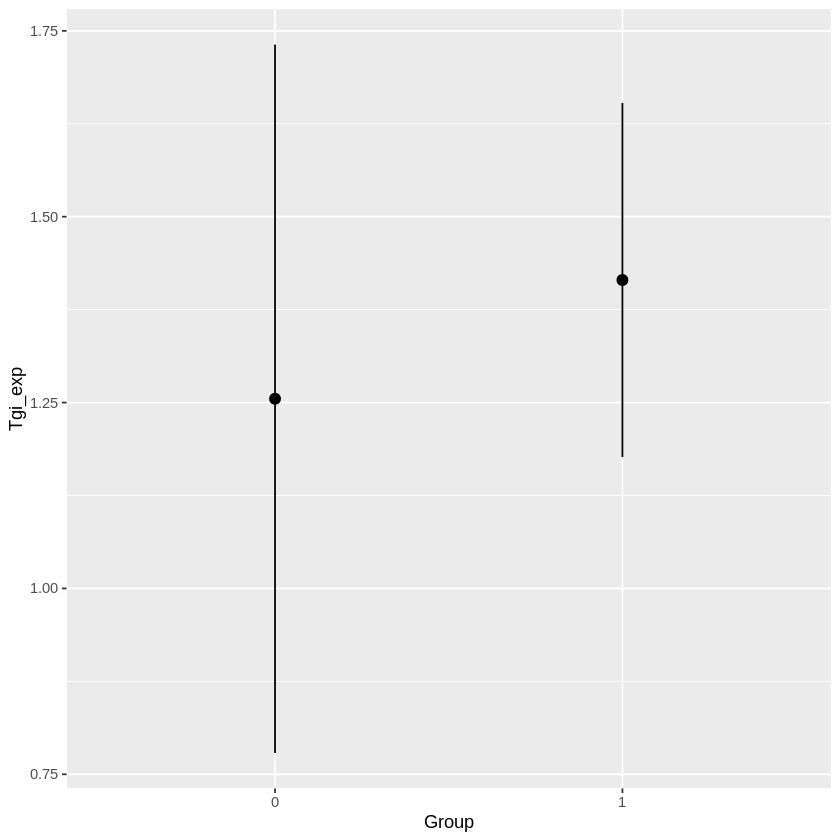

In [76]:
ggplot(data_metadata, aes(x = Group, y = Tgi_exp, colour = Tgi_exp)) + stat_summary(fun.data = "mean_cl_normal")

In [83]:
anova_carotidIMTmean <- aov(carotidIMTmean ~ Group, data = data_metadata)

summary(anova_carotidIMTmean)

            Df Sum Sq Mean Sq F value Pr(>F)  
Group        1 0.0855 0.08554   6.325 0.0165 *
Residuals   36 0.4869 0.01352                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [84]:
anova_tgi_exp <- aov(Tgi_exp ~ Group, data = data_metadata)

summary(anova_tgi_exp)

            Df Sum Sq Mean Sq F value Pr(>F)
Group        1  0.226  0.2256   0.503  0.483
Residuals   36 16.162  0.4489               

In [85]:
TukeyHSD(anova_carotidIMTmean)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = carotidIMTmean ~ Group, data = data_metadata)

$Group
          diff        lwr       upr     p adj
1-0 0.09835813 0.01903932 0.1776769 0.0165125


In [86]:
TukeyHSD(anova_tgi_exp)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Tgi_exp ~ Group, data = data_metadata)

$Group
         diff        lwr       upr     p adj
1-0 0.1597331 -0.2972556 0.6167218 0.4829597


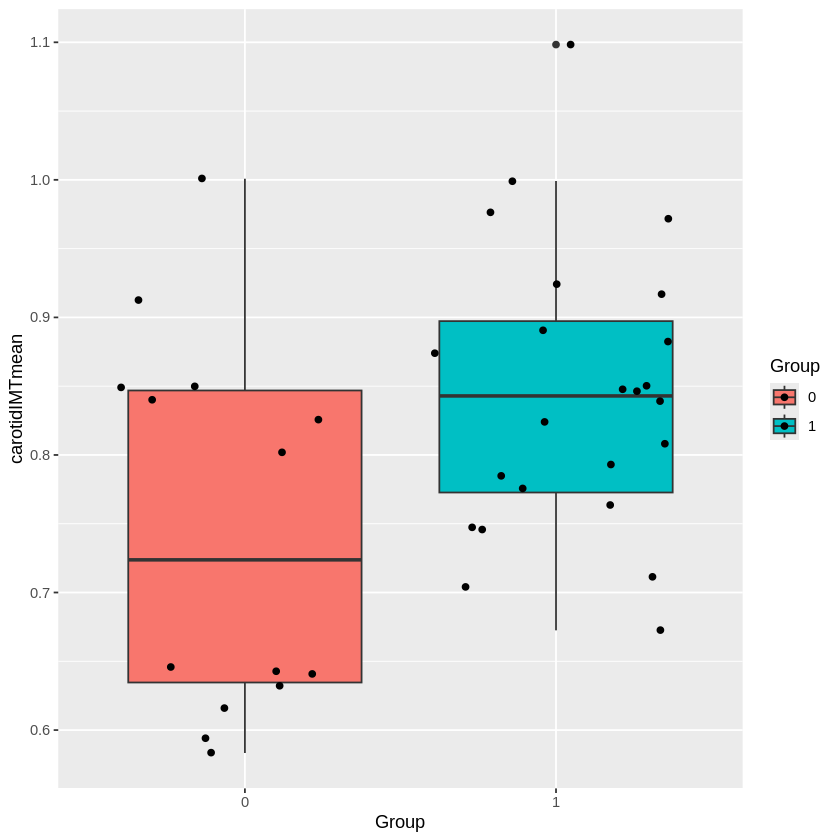

In [87]:
ggplot(data_metadata, aes(x = Group, y = carotidIMTmean, fill = Group)) + geom_boxplot() + geom_jitter()

In [89]:
mod_cm <- lm(carotidIMTmean ~ Group, data = data_metadata)
summary(mod_cm)


Call:
lm(formula = carotidIMTmean ~ Group, data = data_metadata)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.171215 -0.099113 -0.000799  0.080470  0.255476 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.74536    0.03108  23.981   <2e-16 ***
Group1       0.09836    0.03911   2.515   0.0165 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1163 on 36 degrees of freedom
Multiple R-squared:  0.1494,	Adjusted R-squared:  0.1258 
F-statistic: 6.325 on 1 and 36 DF,  p-value: 0.01651


In [90]:
cm_anova <- Anova(mod_cm)
cm_anova

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Group,0.08554138,1,6.324764,0.01651255
Residuals,0.48689402,36,NA,NA


In [91]:
bartlett.test(carotidIMTmean ~ Group,  data = data_metadata)


	Bartlett test of homogeneity of variances

data:  carotidIMTmean by Group
Bartlett's K-squared = 1.37, df = 1, p-value = 0.2418


In [92]:
kruskal.test(carotidIMTmean ~ Group,  data = data_metadata)


	Kruskal-Wallis rank sum test

data:  carotidIMTmean by Group
Kruskal-Wallis chi-squared = 4.0501, df = 1, p-value = 0.04417


In [94]:
pairwise.wilcox.test(data_metadata$carotidIMTmean, data_metadata$Group, p.adjust.method = 'BH')

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  data_metadata$carotidIMTmean and data_metadata$Group 

  0    
1 0.046

P value adjustment method: BH 